## Get the subset of Yelp restaurant

https://www.kaggle.com/yelp-dataset/yelp-dataset

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("yelp_business.csv")
df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [13]:
df.shape

(174567, 13)

In [14]:
df["city"].value_counts()

Las Vegas           26775
Phoenix             17213
Toronto             17206
Charlotte            8553
Scottsdale           8228
                    ...  
Canyon Village          1
Laval, Pont Viau        1
Straiton                1
Longniddry              1
Westview                1
Name: city, Length: 1093, dtype: int64

### Extract the data

In [15]:
# Las Vegas subset
LV = df[df["city"]=="Las Vegas"]
LV = LV[LV["is_open"]==1]

In [16]:
LV["categories"].value_counts().head()

Beauty & Spas;Nail Salons    99
Restaurants;Mexican          94
Mexican;Restaurants          92
Nail Salons;Beauty & Spas    83
Auto Repair;Automotive       76
Name: categories, dtype: int64

In [17]:
# Restaurants in Las Vegas
LVR = LV[LV['categories'].str.contains('Restaurants')==True] 
LVR.shape

(3990, 13)

In [18]:
LVR.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
52,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,13,1,Nightlife;Bars;Barbeque;Sports Bars;American (...
53,4srfPk1s8nlm1YusyDUbjg,"""Subway""",Southeast,"""6889 S Eastern Ave, Ste 101""",Las Vegas,NV,89119,36.064652,-115.118954,2.5,6,1,Fast Food;Restaurants;Sandwiches
54,n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,1,Arcades;Arts & Entertainment;Gastropubs;Restau...


In [19]:
min(LVR['longitude']), max(LVR['longitude'])

(-115.6796317, -114.89602762700001)

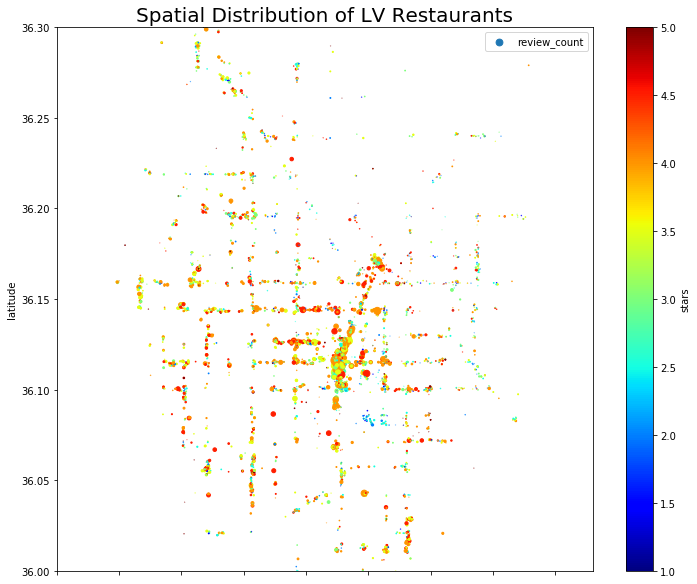

In [20]:
LVR.plot(kind="scatter", x="longitude", y="latitude",
    s=LVR['review_count']/80, label="review_count",
    c="stars", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=1, figsize=(12,10),)
plt.ylim(36, 36.3)
plt.xlim(-115.4, -114.97)
plt.xlabel('longitude')
plt.legend()
plt.title("Spatial Distribution of LV Restaurants", fontsize=20)
plt.savefig("LVRmap.png")

In [21]:
WORDS=[]
for i in range(LVR.shape[0]):
    words=LVR["categories"].astype('str').iloc[i].split(";")
    for word in words:
        WORDS.append(word)

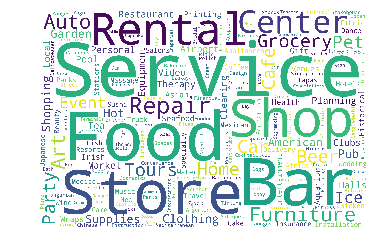

In [154]:
wc = WordCloud(stopwords=STOPWORDS,background_color='white',
               width=3000,height=2000).generate(" ".join(set(WORDS)))
plt.imshow(wc)
plt.axis('off')
plt.savefig("tagswordcloud.png")

In [103]:
Ameri = ["American (New)", "American (Traditional)", "Burgers", "Chicken Wings",
        "Fast Food", "Hot Dogs", "Salad", "Sandwiches", "Barbeque"
         "Smokehouse", "Pizza", "Cheesesteaks", "Cafeteria"]
Europ = ["Italian", "French", "British", "Hungarian", "Portuguese", "German",
         "Russian", "Spanish", "Tex-Mex", "Ukrainian", "Fish & Chips", 
         "Greek", "Irish", "Modern European", "Polish", "Bulgarian", "Armenian"]
SouAM = ["Mexican", "Argentine", "Cajun", "Caribbean", "Peruvian",
         "Honduran", "Salvadoran", "Venezuelan", "Puerto Rican", "Colombian",
         "New Mexican Cuisine", "Nicaraguan", "Tacos", "Latin American"]
Asian = ["Thai", "Chinese", "Japanese", "Fusion", "Taiwanese",
         "Korean", "Indian", "Cantonese", "Shanghainese", "Szechuan",
         "Dim Sum", "Filipino","Hawaiian", "Curry", "Asian", "Pan Asian",
         "Ramen", "Soba", "Vietnamese", "Singaporean", "Mongolian", 
         "Guamanian", "Himalayan/Nepalese", "Hot Pot", "Malaysian",
         "Middle Eastern", "Sushi Bars", "Hong Kong Style Cafe"]
MidEas = ["Mediterranean","Kebab", "Pakistani", "Persian/Iranian", 
          "Falafel", "Lebanese"]
Drinks = ["Beer", "Tea", "Coffee", "Wine Bars", "Pubs", "Bubble Tea", 
          "Wineries", "Wine & Spirits", "Tea Rooms", "Irish Pub", 
          "Juice Bars & Smoothies", "Bars"]

In [108]:
FoodCate=["Ameri", "Europ", "SouAM", "Asian", "MidEas", "Drinks"]
FoodCateKeys=[Ameri, Europ, SouAM, Asian, MidEas, Drinks]

In [105]:
def fooddummy(df, keywords):
        for key in keywords: 
            if key in df['categories']:
                return 1     
        else:
            return 0
LVR["Asian"]=LVR.apply(fooddummy, args=(Asian,), axis=1)
LVR["European"]=LVR.apply(fooddummy, args=(Europ,), axis=1)
LVR["SouthAmer"]=LVR.apply(fooddummy, args=(SouAM,), axis=1)
LVR["MiddEast"]=LVR.apply(fooddummy, args=(MidEas,), axis=1)
LVR["Drinks"]=LVR.apply(fooddummy, args=(Drinks,), axis=1)
LVR["American"] = LVR.apply(fooddummy, args=(Ameri,), axis=1)

In [110]:
#create new column for food categories
for index, name in enumerate(FoodCate):
    LVR[name] = LVR.apply(fooddummy, args=(FoodCateKeys[index],), axis=1)

In [119]:
#calculate counts
FoodCateCts = []
for index, name in enumerate(FoodCate):
    FoodCateCts.append(LVR[name].value_counts()[1])
sum(FoodCateCts)

7449

In [118]:
LVR.shape[0]

5899

In [121]:
FoodCateCts

[3052, 646, 865, 1404, 163, 1319]

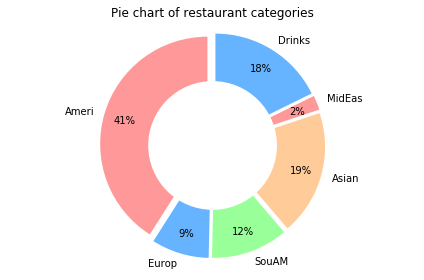

In [165]:
labels = FoodCate
sizes = FoodCateCts
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', 
        startangle=90, pctdistance=0.8, explode = explode)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Pie chart of restaurant categories")
plt.axis('equal')  
plt.tight_layout()
plt.savefig("Pie chart of restaurant categories.png")

### Save the data

In [26]:
LVR = LVR.drop(["city","state", "postal_code", 
                "is_open", "business_id"], axis=1)
LVR.to_csv('Las Vegas Restaurant.csv', encoding='utf-8')